<a href="https://colab.research.google.com/github/bhuvaneswarilakshmipathy/ML_programs_/blob/main/1)_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DIABETES DATASET USING LINEAR REGRESSION**


Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
first five rows of data:
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]


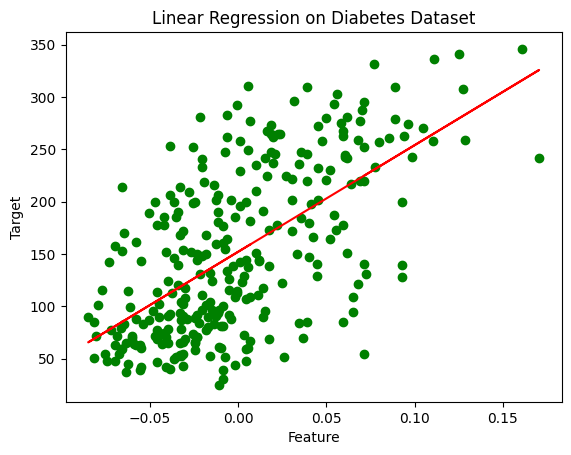

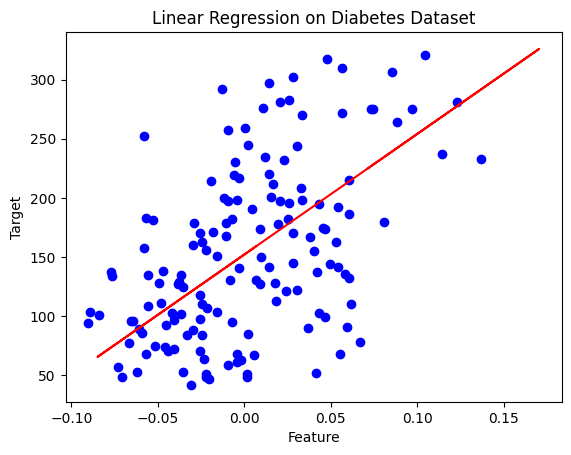

Coefficients: [1018.73538781]
Intercept: 152.14519748803136
Mean Squared Error: 3952.5237308667597
Coefficient of Determination (R^2 Score): 0.24353975013465823


In [ ]:
import numpy as np
import matplotlib.pyplot as mtp
import pandas as pd
from sklearn import datasets, linear_model
diabetes = datasets.load_diabetes()
print ("Feature names:",diabetes['feature_names'])
print("first five rows of data:\n",diabetes['data'][:5])


x = diabetes.data[:, np.newaxis, 2]
y = diabetes.target # define the target variable (dependent variable) as y
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 1/3, random_state=0)



from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)



y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)



mtp.scatter(x_train, y_train, color="green")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Linear Regression on Diabetes Dataset")
mtp.xlabel("Feature")
mtp.ylabel("Target")
mtp.show()



mtp.scatter(x_test, y_test, color="blue")
mtp.plot(x_train, x_pred, color="red")
mtp.title("Linear Regression on Diabetes Dataset")
mtp.xlabel("Feature")
mtp.ylabel("Target")
mtp.show()



print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)


from sklearn.metrics import mean_squared_error, r2_score
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))


print('Coefficient of Determination (R^2 Score):', r2_score(y_test, y_pred))



# **LINEAR REGRESSION WITH CROSS VALIDATION, IMPROVED VISUALIZATION AND RESIDUALS PLOT**

Feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
First five rows of data:
 [[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
Cross-Validation Scores: [0.42955615 0.52259939 0.48268054 0.42649776 0.55024834]
Average Cross-Validation Score: 0.48231643590864215


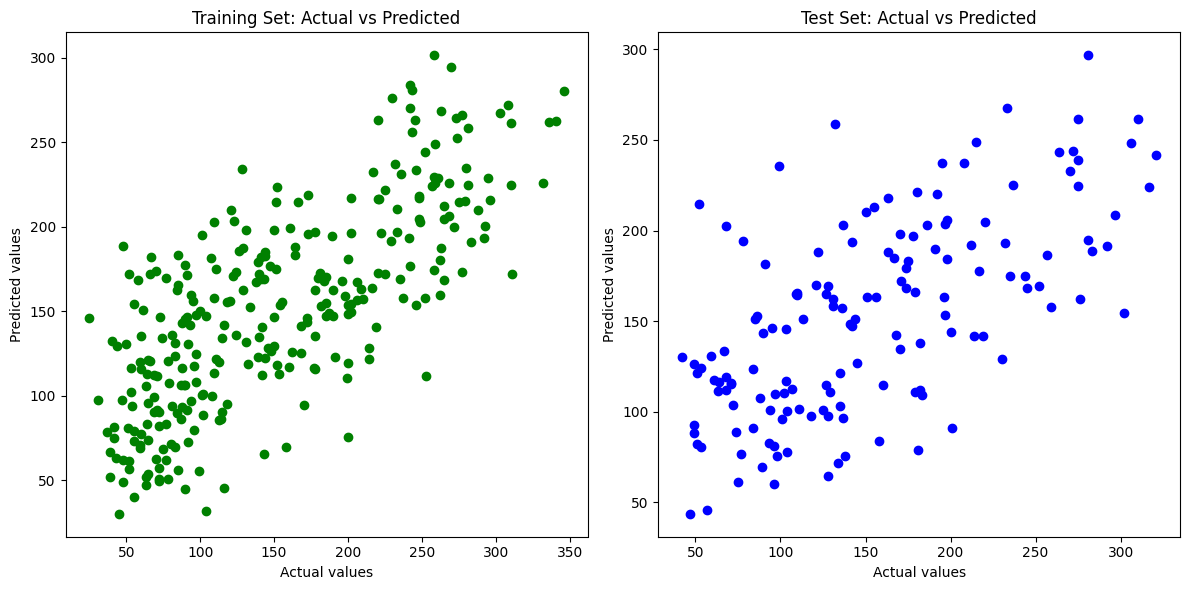

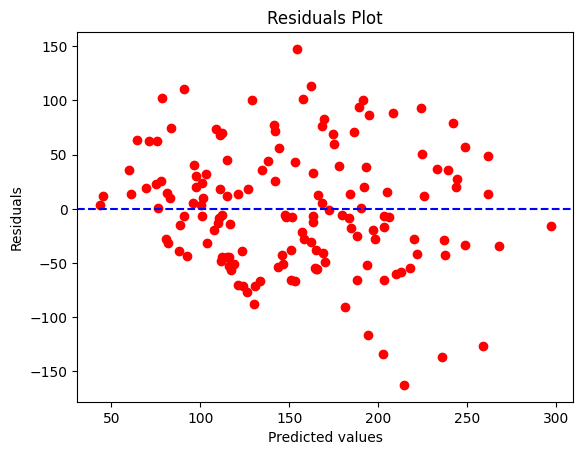

Coefficients: [ -1.95189417  -8.89983937  28.36196452  13.45915513 -32.43351546
  18.42019842   0.6495538    3.46781197  38.82167293   1.96000284]
Intercept: 151.5408163265306
Mean Squared Error: 3113.59854453636
Coefficient of Determination (R^2 Score): 0.4040988256220195


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
print("Feature names:", diabetes['feature_names'])
print("First five rows of data:\n", diabetes['data'][:5])

# Use all features for training
x = diabetes.data
y = diabetes.target

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=1/3, random_state=0)

# Feature scaling
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Train a linear regression model
regressor = LinearRegression()
regressor.fit(x_train_scaled, y_train)

# Make predictions
y_pred = regressor.predict(x_test_scaled)

# Cross-validation
scores = cross_val_score(regressor, x, y, cv=5)
print('Cross-Validation Scores:', scores)
print('Average Cross-Validation Score:', np.mean(scores))

# Plot the results for the training set
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, regressor.predict(x_train_scaled), color='green')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Training Set: Actual vs Predicted')

# Plot the results for the test set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred, color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Test Set: Actual vs Predicted')

plt.tight_layout()
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure()
plt.scatter(y_pred, residuals, color='red')
plt.axhline(y=0, color='blue', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()

# Print coefficients and intercept
print('Coefficients:', regressor.coef_)
print('Intercept:', regressor.intercept_)

# Print performance metrics
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Coefficient of Determination (R^2 Score):', r2_score(y_test, y_pred))
